In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([3.8, 2.3, 1.4, 1.1, 0.9, 0.7, 0.6])

test_x = np.array([8, 9, 10])

Нанесемо дані на графік:

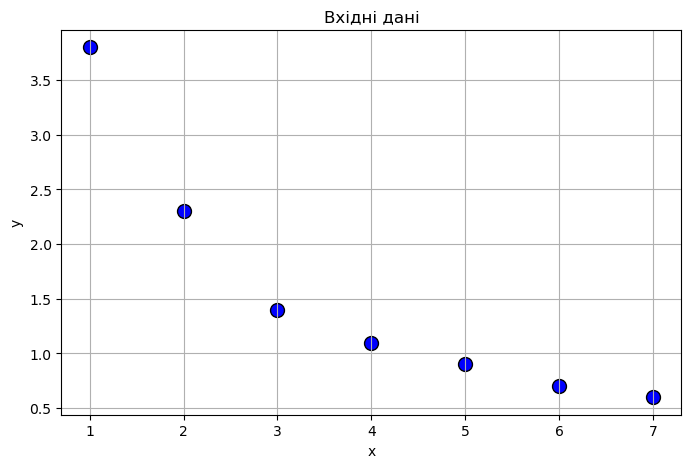

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=100, edgecolor='black')
plt.title('Вхідні дані')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Тут неозброєним оком видно, що ми маємо справу з нелінійною залежністю. Та все ж для наочності давайте спочатку побудуємо лінійну регресію.

In [6]:
class LSM:
    """
    Least Squared Method implementation.
    """
    def __init__(self):
        """
        Construct the object.
        """
        self.a = None
        self.b = None

        self.r2_score = None
        self.corr_coef = None

    def fit(self, x, y):
        """
        Apply least squared method for given x and y values and calculate a and b.

        Arguments:
            x (np.array): independent variable.
            y (np.array): dependent variable.
        """
        n = len(x)
        x_mean = np.mean(x)
        y_mean = np.mean(y)

        self.a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
        self.b = y_mean - self.a * x_mean


    def predict(self, x):
        """
        Run predictions.

        Arguments:
            x (np.array): independent variable values for which prediction should be done.

        Returns:
            predicted values as a np.array.
        """
        y_pred = self.a * x + self.b

        return y_pred

    def score(self, x, y, print_output=True):
        """
        Calculate the coefficient of determination (R²).

        Arguments:
            x (np.array): independent variable.
            y (np.array): dependent variable.

        Returns:
            float: R² score.
        """
        self.fit(x=x, y=y)
        y_pred = self.predict(x=x)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        self.r2_score = 1 - ss_res / ss_tot
        self.corr_coef = self.r2_score**0.5

        if print_output:
            print(f'Corellation coefficinet is: {self.corr_coef}')
            print(f'R2 score is: {self.r2_score}')
        

    def calc_confidence_interval(self, x, y):
        """
        Calculate confidence interval for predictions.

        Arguments:
            x (np.array): independent variable.
            y (np.array): dependent variable.

        Returns:
            lower_bound (np.array): lower bound of confidence interval.
            upper_bound (np.array): upper bound of confidence interval.
        """
        t = 4.03
        
        self.fit(x=x, y=y)
        y_pred = self.predict(x=x)

        residuals = y - y_pred
        stdev_residuals = np.sqrt(np.sum(residuals**2) / (len(x) - 2))
        sum_xx = np.sum((x - np.mean(x))**2)

        stand_error = stdev_residuals * np.sqrt(1/(len(x)) + ((x - np.mean(x))**2) / sum_xx)
        lower_bound = y_pred - t * stand_error
        upper_bound = y_pred + t * stand_error

        return lower_bound, upper_bound

<h3>Лінійна залежність</h3>

In [8]:
lsm = LSM()
lsm.fit(x=x, y=y)
y_pred = lsm.predict(x=x)

lsm.score(x=x, y=y)

y_test_pred = lsm.predict(x=test_x)

lower_bound, upper_bound = lsm.calc_confidence_interval(x=x, y=y)

Corellation coefficinet is: 0.8944120221757117
R2 score is: 0.7999728654124458


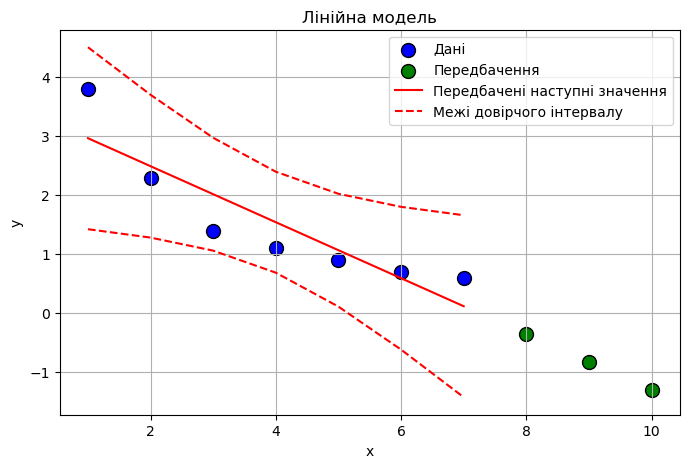

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=100, edgecolor='black', label='Дані')
plt.scatter(test_x, y_test_pred, color='green', s=100, edgecolor='black', label='Передбачення')
plt.plot(x, y_pred, color='red', label='Передбачені наступні значення')
plt.plot(x, lower_bound, color='red', linestyle='--', label='Межі довірчого інтервалу')
plt.plot(x, upper_bound, color='red', linestyle='--')
plt.title('Лінійна модель')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Бачимо, що модель погано вловлює тренд.

<h3>Обернено пропорційна залежність</h3>

З розкиду точок на графіку видно, що він нагадує гіперболу, тому ми маємо справу з обернено пропорційною (інверсною) моделлю.

In [13]:
def transform_to_inverse(x, power=1):
    """
    Apply inverse transformation on a given array.

    Arguments:
        x (np.array): input array to inverse.

    Returns:
        inversed array as np.array.
    """
    return 1/np.power(x, power)

In [14]:
inversed_x = transform_to_inverse(x=x)

lsm = LSM()
lsm.fit(x=inversed_x, y=y)
y_pred = lsm.predict(x=inversed_x)

lsm.score(x=inversed_x, y=y)

inversed_test_x = transform_to_inverse(x=test_x)
y_test_pred = lsm.predict(x=inversed_test_x)

lower_bound, upper_bound = lsm.calc_confidence_interval(x=inversed_x, y=y)

Corellation coefficinet is: 0.9937384999156015
R2 score is: 0.9875162062145099


In [15]:
inversed_x

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714])

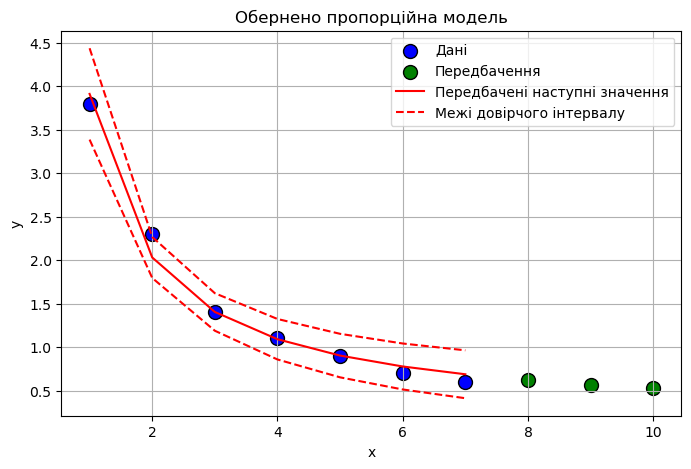

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=100, edgecolor='black', label='Дані')
plt.scatter(test_x, y_test_pred, color='green', s=100, edgecolor='black', label='Передбачення')
plt.plot(x, y_pred, color='red', label='Передбачені наступні значення')
plt.plot(x, lower_bound, color='red', linestyle='--', label='Межі довірчого інтервалу')
plt.plot(x, upper_bound, color='red', linestyle='--')
plt.title('Обернено пропорційна модель')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

<h3>Обернено пропорційна залежність (оптимальна модель)</h3>

Знайдемо значення степені при якому маємо найбільше значення коефіцієнту детермінації

In [19]:
max_r2_score = -1
optimal_inversed_power = 0.1
while True:
    inversed_power = optimal_inversed_power + 0.01
    inversed_x = transform_to_inverse(x=x, power=optimal_inversed_power)
    lsm = LSM()
    lsm.score(x=inversed_x, y=y, print_output=False)
    if lsm.r2_score > max_r2_score:
        max_r2_score = lsm.r2_score
        optimal_inversed_power = np.round(inversed_power, 2)

    else:
        break

In [20]:
optimal_inversed_power

0.65

Отже, найкраще описує дані рівняння у=а+b/(x^0.65)

In [22]:
inversed_x = transform_to_inverse(x=x, power=optimal_inversed_power)

lsm = LSM()
lsm.fit(x=inversed_x, y=y)
y_pred = lsm.predict(x=inversed_x)

lsm.score(x=inversed_x, y=y)

inversed_test_x = transform_to_inverse(x=test_x, power=optimal_inversed_power)
y_test_pred = lsm.predict(x=inversed_test_x)

lower_bound, upper_bound = lsm.calc_confidence_interval(x=inversed_x, y=y)

Corellation coefficinet is: 0.9981353286501163
R2 score is: 0.9962741342994756


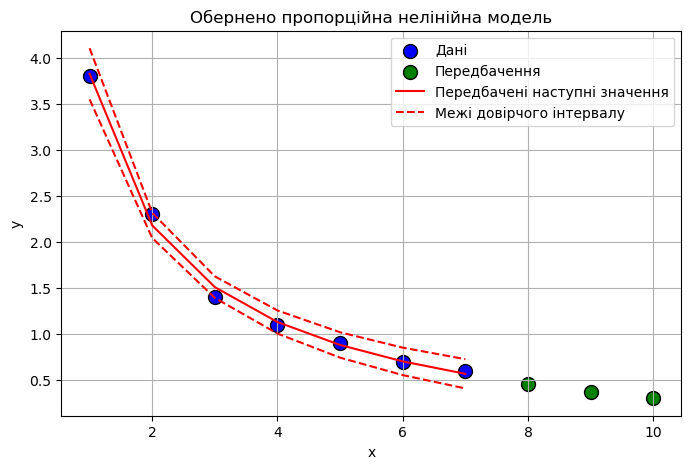

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', s=100, edgecolor='black', label='Дані')
plt.scatter(test_x, y_test_pred, color='green', s=100, edgecolor='black', label='Передбачення')
plt.plot(x, y_pred, color='red', label='Передбачені наступні значення')
plt.plot(x, lower_bound, color='red', linestyle='--', label='Межі довірчого інтервалу')
plt.plot(x, upper_bound, color='red', linestyle='--')
plt.title('Обернено пропорційна нелінійна модель')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()